In [1]:
import cv2 as cv
import numpy as np
import imutils as iu
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as kr

# Exercício 1:

1. Abra a imagem figs/messi5.jpg  
1. Recorte a bola  
1. Copie em outra parte da imagem
1. Rotacione a imagem em 60 graus
1. Altere o tamanho da imagem mantendo a proporção

In [2]:
!dir figs

 Volume in drive C has no label.
 Volume Serial Number is DC82-FD6F

 Directory of C:\Users\cv\Dropbox\ia\github\3.4_introducao-CNN\figs

30-Apr-20  09:36 AM    <DIR>          .
30-Apr-20  09:36 AM    <DIR>          ..
30-Apr-20  09:36 AM            61,041 11.jpg
29-Apr-20  09:51 AM            95,956 baby.png
29-Apr-20  09:51 AM           118,221 blobs.png
28-Apr-20  09:21 AM            92,460 cinza.jpg
28-Apr-20  09:30 AM           125,233 cinzaout.jpg
29-Apr-20  09:51 AM            68,956 degrade.png
29-Apr-20  09:51 AM           383,751 hero.png
28-Apr-20  09:21 AM           631,970 HubIA_Poligonos_data_cultura.csv
28-Apr-20  09:21 AM            29,973 imgTeste.jpg
29-Apr-20  09:51 AM             1,126 j.png
28-Apr-20  09:21 AM            11,794 JP.jpeg
28-Apr-20  09:21 AM            92,290 JP2.jpg
28-Apr-20  09:21 AM            68,154 logo.png
28-Apr-20  09:21 AM            39,289 messi5.jpg
29-Apr-20  09:51 AM            31,653 noisy.jpg
29-Apr-20  10:07 AM            31,671 openc

## `1.1 Abra a imagem messi5.jpg`

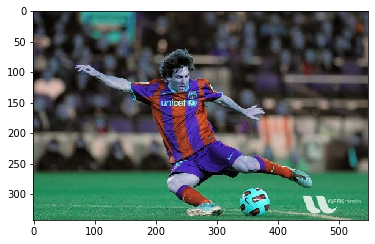

In [3]:
img = cv.imread('figs/messi5.jpg')

plt.imshow(img)

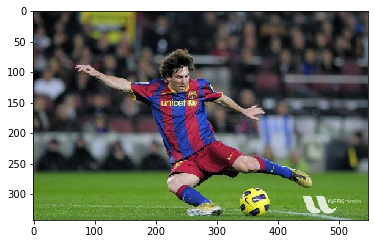

In [4]:
img = cv.imread('figs/messi5.jpg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## `1.2 Recorte a bola`

(58, 55, 3)


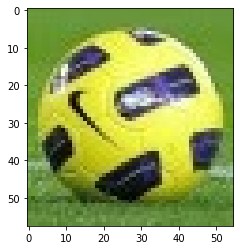

In [5]:
roi = img[284:390, 335:390]
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))
print(roi.shape)

(58, 55, 3)


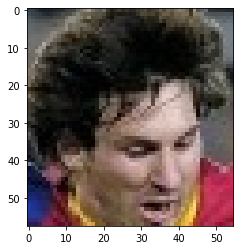

In [6]:
roi2 = img[71:129, 210:265]
plt.imshow(cv.cvtColor(roi2, cv.COLOR_BGR2RGB))
print(roi2.shape)

## `1.3 Copie em outra parte da imagem`

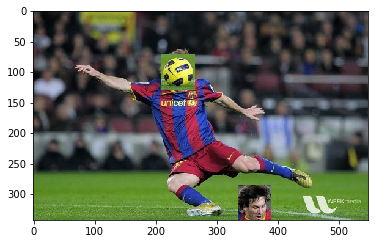

In [7]:
roi = img[284:390, 335:390]
roi2 = img[71:129, 210:265]

img2 = img.copy()
img2[71:129,  210:265] = roi
img2[284:390, 335:390] = roi2


plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))

## `1.4 Rotacione a imagem em 60 graus`

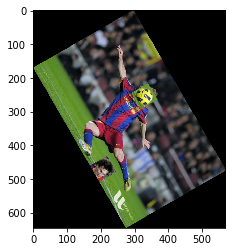

In [8]:
rotated = iu.rotate_bound(img2, 60)
plt.imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))

## `1.5 Altere o tamanho da imagem mantendo a proporção`

Original Dimensions :  (342, 548, 3)
novas dimensões :  (205, 328, 3)


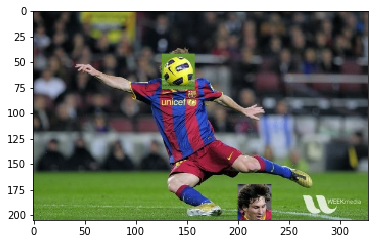

In [9]:
print('Original Dimensions : ',img2.shape)
 
scale_percent = 60 # porcentagem da imagem original
width = int(img2.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv.resize(img2,dim)
 
print('novas dimensões : ',resized.shape)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))

# Exercício 2:
1. Avalie o uso de filtros para eliminar ruídos e detectar contornos na imagem figs/11.jpg  
2. Utilize os padrões definidos em https://github.com/opencv/opencv/tree/master/data/haarcascades para criar dois classificadores, teste os classificadores com imagens aleatórias

## `2.1 Avalie filtros para eliminar ruídos e detectar contornos na imagem 11.jpg`

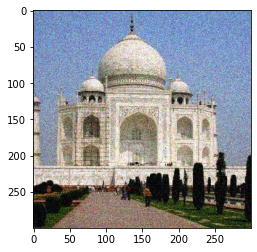

In [4]:

img2 = cv.imread('figs/11.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

plt.imshow(img2)

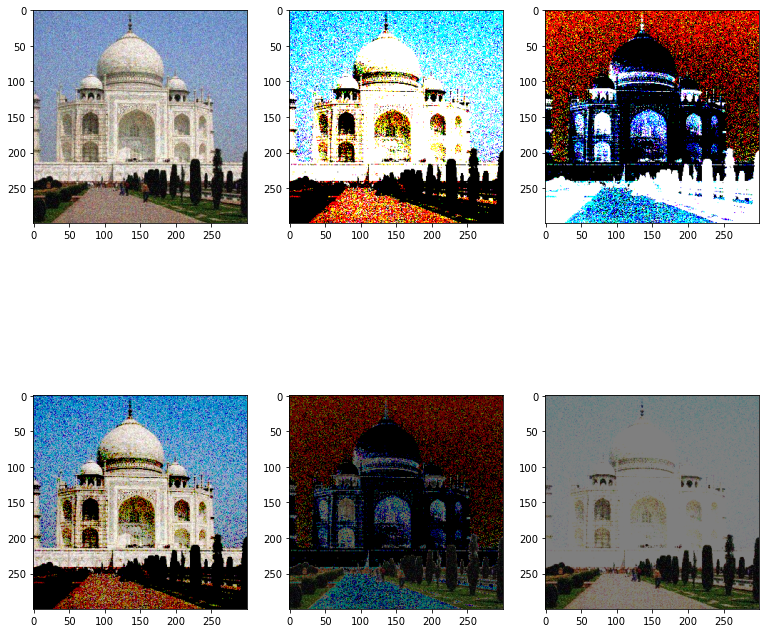

In [5]:
# Thresholding 
_, thresh_0 = cv.threshold(img2, 127, 255, cv.THRESH_BINARY)
_, thresh_1 = cv.threshold(img2, 127, 255, cv.THRESH_BINARY_INV)
_, thresh_2 = cv.threshold(img2, 127, 255, cv.THRESH_TOZERO)
_, thresh_3 = cv.threshold(img2, 127, 255, cv.THRESH_TOZERO_INV)
_, thresh_4 = cv.threshold(img2, 127, 255, cv.THRESH_TRUNC)
# Plot the images
images = [img2, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()

In [7]:
# Convert the image to grayscale
img3 = cv.imread('figs/11.jpg')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
# Adaptive Thresholding
_, thresh_binary = cv.threshold(img3, thresh = 127, maxval = 255, type = cv.THRESH_BINARY)
adap_mean_2 = cv.adaptiveThreshold(img3, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv.adaptiveThreshold(img3, 255, 
                                        cv.ADAPTIVE_THRESH_MEAN_C, 
                                        cv.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv.adaptiveThreshold(img3, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv.adaptiveThreshold(img3, 255, 
                                    cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv.THRESH_BINARY, 7, 8)

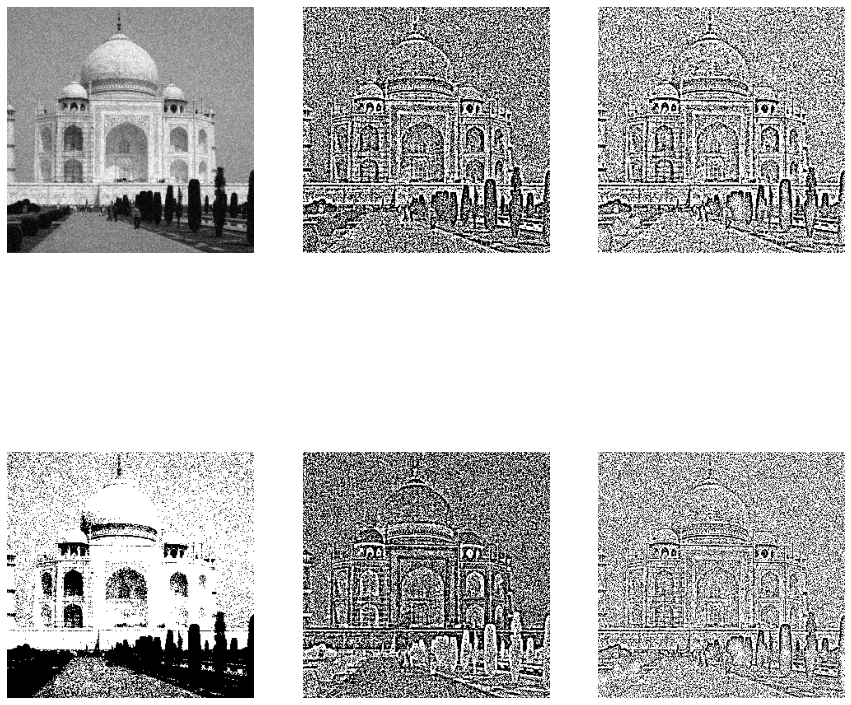

In [8]:
# Plot the images
images = [img3, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

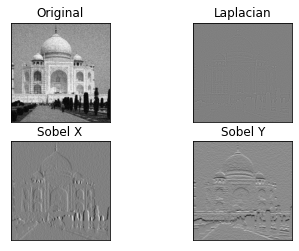

In [10]:
################### Filtro de Sobel ###################

img4 = cv.imread('figs/11.jpg')
img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

laplacian = cv.Laplacian(img4,cv.CV_64F)
sobelx = cv.Sobel(img4,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img4,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img4,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
######################## Erosão ##########################


img = cv.imread('figs/simpsons.png')

#Criando kernels (filtros) para erosão
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv.getStructuringElement(cv.MORPH_CROSS, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]


plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()



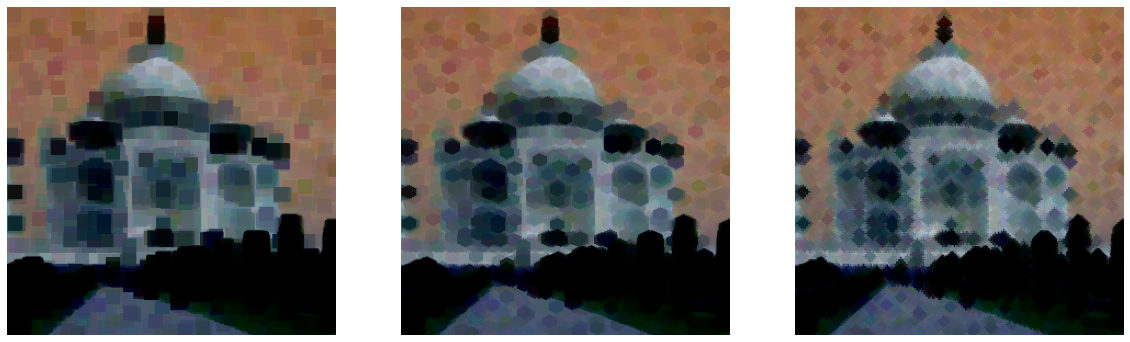

In [15]:
####################### Erosão #######################

img = cv.imread('figs/11.jpg')

#Criando kernels (filtros) para erosão
kernel_0 = np.ones((5, 5), np.uint8)
kernel_1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
kernel_2 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))
kernels = [kernel_0, kernel_1, kernel_2]


plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

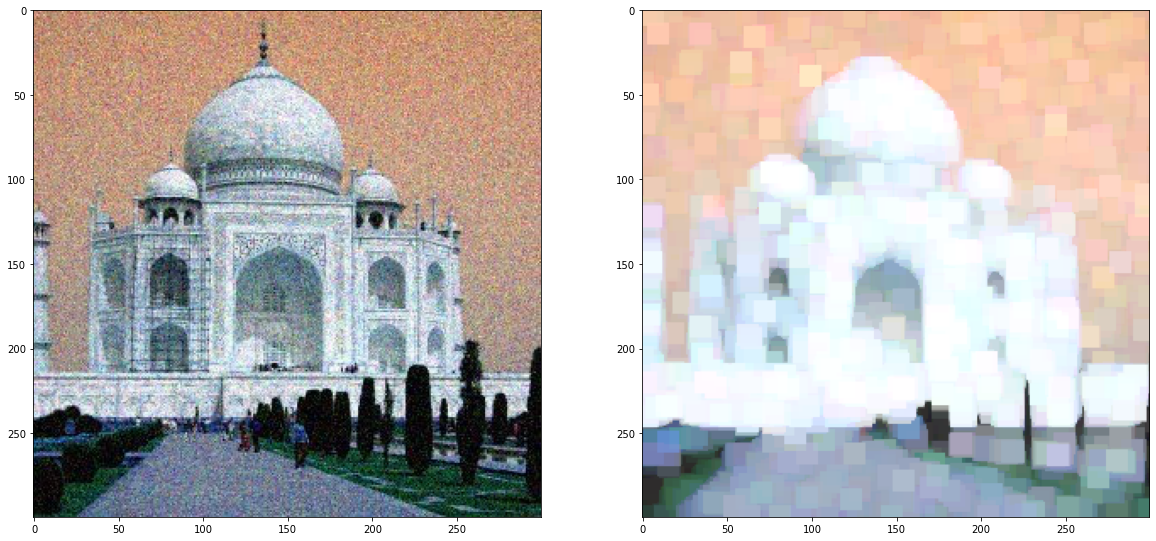

In [29]:
######################## Dilatação ##############

img = cv.imread('figs/11.jpg')
kernel = np.ones((5, 5), np.uint8)
img_dilate = cv.dilate(img, kernel, iterations = 3)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.show()

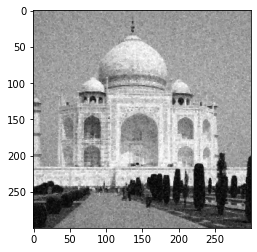

In [19]:
##################### Fechamento ########################

img = cv.imread('figs/11.jpg',0)
kernel = np.ones((2,2),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

img = cv.cvtColor(closing, cv.COLOR_BGR2RGB)

plt.imshow(img)

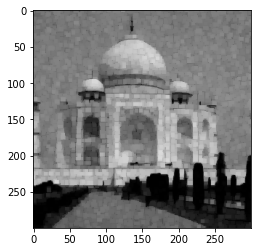

In [20]:
###################### Abertura ##################

img = cv.imread('figs/11.jpg',0)
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

img = cv.cvtColor(opening, cv.COLOR_BGR2RGB)

plt.imshow(img)

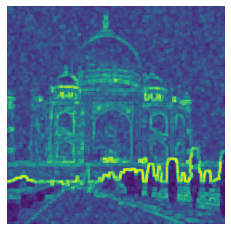

In [21]:
################ Gradiente morfológico ######################3

import cv2 as cv
import numpy as np
img = cv.imread('figs/11.jpg',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.axis("off")
plt.imshow(gradient)
plt.show()

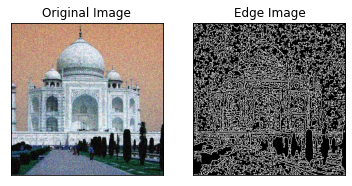

In [23]:
###################### Cany edge ###################

img = cv.imread('figs/11.jpg')

edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## `2.1 Utilize os padrões definidos em https://github.com/opencv/opencv/tree/master/data/haarcascades para criar dois classificadores, teste os classificadores com imagens aleatórias `

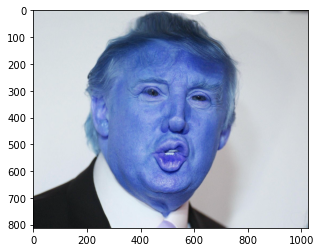

In [35]:
img = cv.imread('figs/turump.jpg')
plt.imshow(img, cmap = 'gray')

In [36]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')

def detect_face(img):
    
    img_2 = img.copy()
    face_rects = face_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
    print(len(face_rects))
    for (x, y, w, h) in face_rects:
        cv.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_2

1


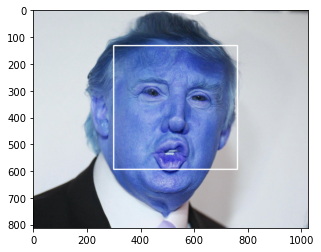

In [37]:
roi_detected = detect_face(img)
plt.imshow(roi_detected, cmap = 'gray')

In [41]:
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

def detect_eye(img):
    
    img_2 = img.copy()
    face_rects = eye_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
 
    print(len(face_rects))
    for (x, y, w, h) in face_rects:
        cv.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_2

1


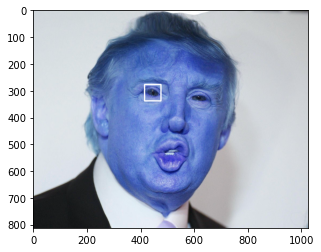

In [42]:
roi_detected = detect_eye(img)
plt.imshow(roi_detected, cmap = 'gray')

# Exercício 3:
1. Montar o ambiente para executar tensorflow com gpu (tensorflow-gpu)
1. Executar código do mnist
1. Fazer teste com uma rede treinada (VGG16)
1. Utilizar a mesma topologia de rede neural usada para o problema minist, aplicando para o problema das abelhas
1. Compare o tempo de treino da rede neural CNN usando CPUxGPU

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2363716998281186330
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4849834393
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8527186638434680164
physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [16]:
import matplotlib.pyplot as plt

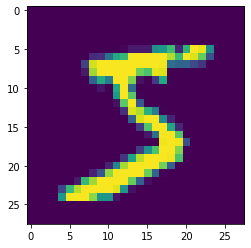

In [23]:
plt.imshow(train_images[0])

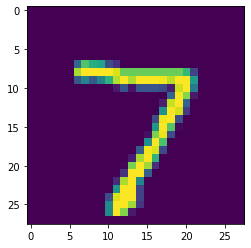

In [24]:
plt.imshow(test_images[0])

In [17]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
#from PIL import Image
import matplotlib.pyplot as plt
import os
import pathlib

from tensorflow.keras.preprocessing.image import load_img as ldimg
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils

from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.inception_v3 import *


from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.1.0


In [18]:
#Sequência de camadas de convolução e pooling
#Camada flatten
#Realiza uma operação de transformar um vetor com múltiplas dimensões para um vetor com apenas uma dimensão. Necessário para adequar corretamente o resultado da convolução com a camada de classificação
#Camada densa com ativação softmax para classificação

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

#Após o processo de Convolução é utilizada uma camada Dense para classificar entre as classes
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2734 - accuracy: 0.9232
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1001 - accuracy: 0.9720
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0736 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0615 - accuracy: 0.9820
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0546 - accuracy: 0.9841


In [21]:
import time

cpu_slot = 0
gpu_slot = 0

# Using CPU at slot 0
with tf.device('/CPU:' + str(cpu_slot)):
    # Starting a timer
    start = time.time()

    # Doing operations on CPU
    model.fit(train_images, train_labels, epochs=5, batch_size=64)
    
    # Printing how long it took with CPU
    end = time.time() - start
    print("CPU: ", end)

# Using the GPU at slot 0
with tf.device('/GPU:' + str(gpu_slot)):
    # Starting a timer
    start = time.time()

    # Doing operations on GPU
    model.fit(train_images, train_labels, epochs=5, batch_size=64)
    
    # Printing how long it took with GPU
    end = time.time() - start
    print("GPU: ",end)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0497 - accuracy: 0.9858
Epoch 2/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0461 - accuracy: 0.9868 - l
Epoch 3/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0431 - accuracy: 0.9879
Epoch 4/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0407 - accuracy: 0.9886
Epoch 5/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0387 - accuracy: 0.9895
CPU:  47.93316578865051
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0370 - accuracy: 0.9898
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0354 - accuracy: 0.9904
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0341 - accuracy: 0.9905
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sampl

### `Fazer teste com uma rede treinada (VGG16)`

In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG16

In [34]:
modelVGG16 = VGG16()

modelVGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import load_img

In [67]:
def load_image(file):
    image = load_img(file, target_size=(224, 224))
    plt.axis(False)
    plt.imshow(image)
    plt.show()
    return image

def identifier(image):
    image = img_to_array(image)
    # acertar formato do array para o modelo
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # calcular probabilidade considerando todos os "labels"
    yhat = modelVGG16.predict(image)
    # Codificar as probabilidades retornadas nos "labels"
    label = decode_predictions(yhat)
    for i, (imagenetID, obj, prob) in enumerate(label[0]):
        print('{} - {}: {:.2f}%'.format(i+1, obj, prob*100))

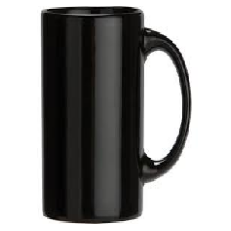

1 - coffee_mug: 63.19%
2 - water_jug: 14.23%
3 - coffeepot: 11.51%
4 - cup: 5.79%
5 - espresso_maker: 2.47%


In [68]:
image = 'figs/mug.jpg'
image = load_image(image)
identifier(image)

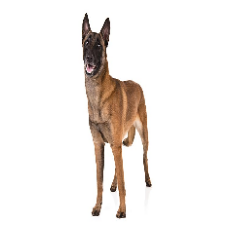

1 - Ibizan_hound: 11.84%
2 - coyote: 11.26%
3 - grey_fox: 8.98%
4 - Mexican_hairless: 8.78%
5 - hare: 5.85%


In [69]:
image = 'figs/dog.jpg'
image = load_image(image)
identifier(image)

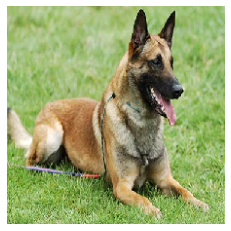

1 - Norwegian_elkhound: 78.36%
2 - German_shepherd: 11.06%
3 - Siberian_husky: 3.96%
4 - kelpie: 2.73%
5 - Eskimo_dog: 2.51%


In [70]:
image = 'figs/dog2.jpg'
image = load_image(image)
identifier(image)

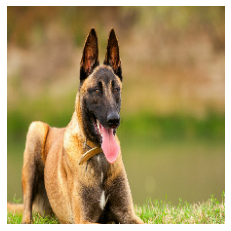

1 - wallaby: 34.14%
2 - Ibizan_hound: 16.84%
3 - hare: 11.30%
4 - bath_towel: 6.76%
5 - German_shepherd: 5.99%


In [71]:
image = 'figs/dog3.jpg'
image = load_image(image)
identifier(image)

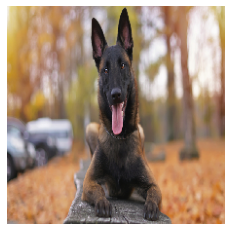

1 - German_shepherd: 41.32%
2 - malinois: 32.18%
3 - Ibizan_hound: 7.02%
4 - hare: 4.18%
5 - wallaby: 3.39%


In [72]:
image = 'figs/dog4.png'
image = load_image(image)
identifier(image)

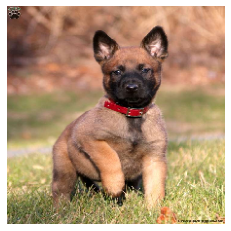

1 - Chihuahua: 48.81%
2 - French_bulldog: 15.27%
3 - kelpie: 13.32%
4 - tennis_ball: 2.75%
5 - Norwegian_elkhound: 2.58%


In [73]:
image = 'figs/dog5.jpg'
image = load_image(image)
identifier(image)

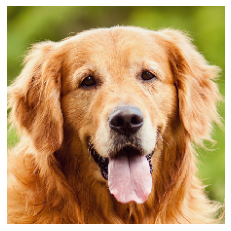

1 - golden_retriever: 61.08%
2 - English_setter: 12.72%
3 - clumber: 11.48%
4 - Brittany_spaniel: 6.00%
5 - kuvasz: 4.53%


In [74]:
image = 'figs/dog6.jpg'
image = load_image(image)
identifier(image)

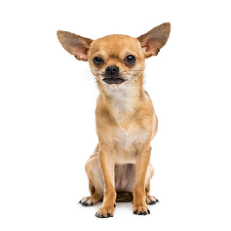

1 - Chihuahua: 97.79%
2 - Egyptian_cat: 0.86%
3 - toy_terrier: 0.67%
4 - Mexican_hairless: 0.57%
5 - miniature_pinscher: 0.09%


In [75]:
image = 'figs/dog7.jpg'
image = load_image(image)
identifier(image)

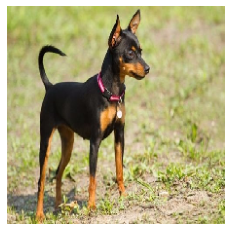

1 - miniature_pinscher: 66.43%
2 - toy_terrier: 8.71%
3 - Mexican_hairless: 7.59%
4 - kelpie: 4.69%
5 - Ibizan_hound: 3.91%


In [76]:
image = 'figs/dog8.jpg'
image = load_image(image)
identifier(image)

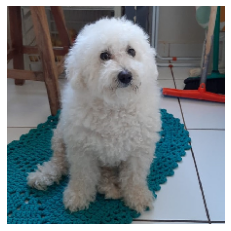

1 - Maltese_dog: 61.04%
2 - toy_poodle: 28.33%
3 - miniature_poodle: 6.26%
4 - komondor: 1.55%
5 - Tibetan_terrier: 0.79%


In [77]:
image = 'figs/dog9.jpg'
image = load_image(image)
identifier(image)

## `3.3 Utilizar a mesma topologia de rede neural usada para o problema minist, aplicando para o problema das abelhas`

In [22]:
import numpy as np
import cv2 as cv

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [23]:
##### Montando função para ler arquivos #####

main_dir = "../../../databases/bees/"
train_dir = "wingsEval"
path = os.path.join(main_dir,train_dir)

X = []
y = []

# Percorre os arquivos no diretório de imagens para treinamento
def create_test_data(path):
    print(path)
    for p in os.listdir(path):
        if '.jpg' in p:
            # categoria da imagem é definida pelo nome do arquivo
            category = p.split(" ")[0]
            # Abre a imagem usando opencv em escala de cinza
            img_array = cv.imread(os.path.join(path,p),cv.IMREAD_GRAYSCALE)
            # Redimensionamento para 80 x 80 pixels
            new_img_array = cv.resize(img_array, dsize=(320, 320))
            X.append(new_img_array)
            y.append(category)
    plt.imshow(new_img_array,cmap="gray")
    plt.axis(False)

../../../databases/bees/wingsEval
formato antes do reshape:
X (1736, 320, 320)
y (1736,)

formato após o reshape:
X (1736, 320, 320, 1)
y (1736,)


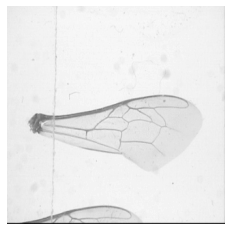

In [24]:
############### Criando database #############

create_test_data(path)

print("formato antes do reshape:")
print("X", np.array(X).shape)
print("y", np.array(y).shape)

print("\nformato após o reshape:")
X = np.array(X).reshape(-1, 320, 320, 1)
y = np.array(y)

print("X", X.shape)
print("y", y.shape)

In [25]:
############ Convertendo dados de X e y #####################################

############ Convertendo valores de X para a escala de 0 a 1 ################
X = X.astype('float32')/255


############ Convertendo valores categóricos de y para numéricos ############

# Primeiramente as classes são tranformadas representações por números inteiros
le = LabelEncoder()
y = le.fit_transform(y)
# Após a aplicação do LabelEncoder, utiliza-se to_categorical do Keras
# to_categorical(y) é equivalente ao OneHotEncoder, transformando em uma matriz Numpy
y = to_categorical(y)
print('Tipos de abelhas: {}'.format(y.shape[1]))

Tipos de abelhas: 25


In [26]:
################# Função para criar a rede ######################


def create_cnn():
    # Camada densa com ativação softmax para ativação 
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(320, 320, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    # Camada flatten
    model.add(layers.Flatten())
    model.add(layers.Dense(25, activation='softmax'))
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    print(model.summary())
    return model

In [27]:
################## Criando o modelo #################
model = create_cnn()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 318, 318, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 159, 159, 32)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 808992)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 25)                20224825  
Total params: 20,225,145
Trainable params: 20,225,145
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Treinando o modelo
history = model.fit(X, y, validation_split=0.15, epochs=20)

Train on 1475 samples, validate on 261 samples
Epoch 1/20
1475/1475 [==============================] - 5s 3ms/sample - loss: 26.2726 - accuracy: 0.0976 - val_loss: 23.1991 - val_accuracy: 0.0000e+00
Epoch 2/20
1475/1475 [==============================] - 2s 2ms/sample - loss: 1.8457 - accuracy: 0.4542 - val_loss: 12.0862 - val_accuracy: 0.0000e+00
Epoch 3/20
1475/1475 [==============================] - 2s 2ms/sample - loss: 0.8460 - accuracy: 0.7959 - val_loss: 9.2427 - val_accuracy: 0.0115
Epoch 4/20
1475/1475 [==============================] - 2s 2ms/sample - loss: 0.4058 - accuracy: 0.9186 - val_loss: 13.9410 - val_accuracy: 0.0000e+00
Epoch 5/20
1475/1475 [==============================] - 2s 2ms/sample - loss: 0.1857 - accuracy: 0.9715 - val_loss: 16.3646 - val_accuracy: 0.0000e+00
Epoch 6/20
1475/1475 [==============================] - 2s 2ms/sample - loss: 0.3381 - accuracy: 0.9498 - val_loss: 21.8103 - val_accuracy: 0.0000e+00
Epoch 7/20
1475/1475 [=============================

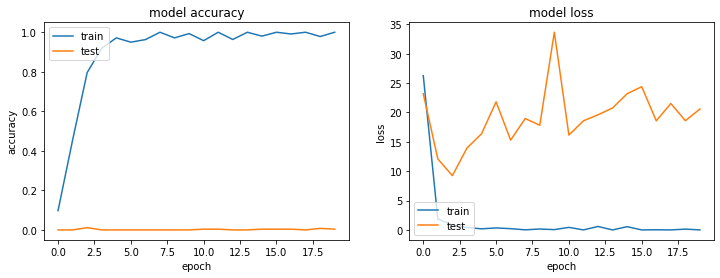

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='upper left')
# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='lower left')
plt.show()

In [48]:
from time import time

# Using CPU at slot 0
model = create_cnn()
cpu_slot = 0
cpu_time = []

with tf.device('/CPU:' + str(cpu_slot)):
    start = time()
    cpu_history = model.fit(X, y, validation_split=0.3, epochs=10, batch_size=32)
    cpu_time.append(time()-start)    
    end = time() - start
    print("CPU: ", end)
    
# Using the GPU at slot 0
model = create_cnn()
gpu_slot = 0
gpu_time = []
with tf.device('/GPU:' + str(gpu_slot)):
    start = time()
    gpu_history = model.fit(X, y, validation_split=0.3, epochs=10, batch_size=32)
    gpu_time.append(time()-start)
    end = time() - start
    print("GPU: ",end)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 318, 318, 32)      320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 159, 159, 32)      0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 808992)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 25)                20224825  
Total params: 20,225,145
Trainable params: 20,225,145
Non-trainable params: 0
_________________________________________________________________
None
Train on 1215 samples, validate on 521 samples
Epoch 1/10
1215/1215 [==============================] - 24s 20ms/sample - loss: 35.4377 - accuracy: 0.1053 - val_loss: 26.2968 - val_accuracy: 0.0000e+00
Epoch 2/10
1215/1215 [===========

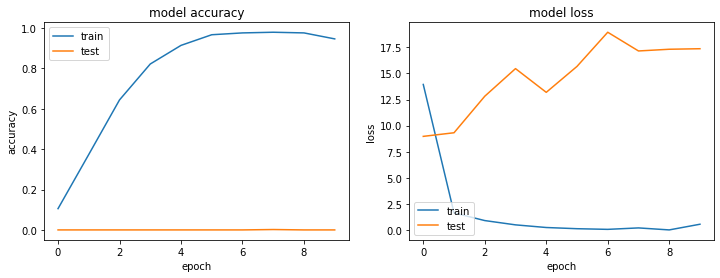

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
# summarize history for accuracy
axs[0].plot(cpu_history.history['accuracy'])
axs[0].plot(cpu_history.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='upper left')
# summarize history for loss
axs[1].plot(gpu_history.history['loss'])
axs[1].plot(gpu_history.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='lower left')
plt.show()